# Step 1: Download the CROHME Dataset

You can download the CROHME dataset from a publicly available source like the following:

CROHME Official Competition Dataset

Alternatively, you can search for “CROHME Dataset” to find additional sources or archives.

In [2]:
import requests
import zipfile
import os
# from google.colab.patches import cv2_imshow
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization

2024-09-22 22:50:43.448844: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-22 22:50:47.781332: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/home/tsp330/miniconda3/lib/python3.12/site-packages/numpy/core/getlimits.py:542: UserWarning: Signature b'\x00\xd0\xcc\xcc\xcc\xcc\xcc\xcc\xfb\xbf\x00\x00\x00\x00\x00\x00' for <class 'numpy.longdouble'> does not match any known type: falling back to type probe function.
This warnings indicates broken support for the dtype!
  machar = _get_machar(dtype)


# Step 2: Unzip the Dataset

Once you download the dataset, unzip it using Python.

In [3]:
# URL of the dataset
url = 'https://ddfe.curtin.edu.au/563B05F210B82/CROHME.zip'

# Path to save the zip file
zip_file_path = 'CROHME.zip'

# Download the file from the URL
print("Downloading the dataset...")
response = requests.get(url)
with open(zip_file_path, 'wb') as f:
    f.write(response.content)
print(f"Downloaded dataset to {zip_file_path}")

# Extract the downloaded ZIP file
print("Extracting the dataset...")
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('crohme_dataset')  # Extract to 'crohme_dataset' folder

print("Extraction completed!")

# Clean up the zip file if no longer needed
os.remove(zip_file_path)
print("ZIP file removed.")

Downloaded dataset to CROHME.zip
Extracting the dataset...
Extraction completed!
ZIP file removed.


# Step 3: Load the Dataset in Python

Assuming the dataset contains .inkml files (the standard format for handwritten mathematical symbols), we need to parse them. We can use libraries like xml.etree.ElementTree for parsing XML-like structures. Alternatively, if the dataset is in another format like images (e.g., .png or .jpg), we can load them using OpenCV.

Here's how you can start with the parsing and loading:

Since the dataset contains image files:

In [4]:
# from google.colab.patches import cv2_imshow

# Define the path where the dataset is stored
dataset_path = 'crohme_dataset/archive/'

'''
# Load all images from the directory
image_files = [f for f in os.listdir(dataset_path) if f.endswith('.png') or f.endswith('.jpg')]

# Check if any image files were found
if image_files:
    # Load and display the first image as an example
    image = cv2.imread(os.path.join(dataset_path, image_files[0]), cv2.IMREAD_GRAYSCALE)
    cv2.imshow('First Image', image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
else:
    print(f"No image files found in {dataset_path}")
'''
'''
# Traverse subfolders and load images
for subdir, dirs, files in os.walk(dataset_path):
    for file in files:
        if file.endswith('.png') or file.endswith('.jpg'):
            # Construct the full image path
            image_path = os.path.join(subdir, file)

            # Load and display the image
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            #cv2.imshow(f"Image: {image_path}", image)
            # cv2_imshow(image) #debug
            cv2.waitKey(0)
            cv2.destroyAllWindows()
'''

'\n# Traverse subfolders and load images\nfor subdir, dirs, files in os.walk(dataset_path):\n    for file in files:\n        if file.endswith(\'.png\') or file.endswith(\'.jpg\'):\n            # Construct the full image path\n            image_path = os.path.join(subdir, file)\n\n            # Load and display the image\n            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)\n            #cv2.imshow(f"Image: {image_path}", image)\n            # cv2_imshow(image) #debug\n            cv2.waitKey(0)\n            cv2.destroyAllWindows()\n'

After unzipping the dataset path, those numbers, letters, and symbols are organized into subfolders under the `crohme_dataset/archive` directory.

## Code to Load and Organize the Dataset

We will now write a script to traverse these sub-folders, load the images, and categorize them for training. This script will load all the images from their respective folders and associate them with their corresponding labels.

In [5]:
import os
import cv2
import numpy as np

# Directory where the dataset is located
dataset_dir = 'crohme_dataset/archive'

# Function to load the images and their labels
def load_crohme_dataset(dataset_dir):
    images = []
    labels = []
    class_names = []

    # Traverse the dataset directory
    for folder_name in os.listdir(dataset_dir):
        folder_path = os.path.join(dataset_dir, folder_name)
        # print(folder_path) #debug

        if os.path.isdir(folder_path):
            # Assign a label to each folder (symbol)
            class_names.append(folder_name)
            label = len(class_names) - 1

            # Load all images from the folder
            for file_name in os.listdir(folder_path):
                file_path = os.path.join(folder_path, file_name)
                if file_path.endswith('.png') or file_path.endswith('.jpg'):
                    # Check if the file exists and is readable
                    if not os.path.isfile(file_path):
                        #print(f"Error: File not found - {file_path}")
                        continue

                    img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)

                    # Check if the image was loaded correctly
                    if img is None:
                        #print(f"Error: Could not read image - {file_path}")
                        continue

                    # Resize all images to the same size (e.g., 64x64)
                    img_resized = cv2.resize(img, (64, 64))

                    # Normalize pixel values to [0, 1]
                    img_normalized = img_resized.astype('float32') / 255.0

                    # Append the image and its label
                    images.append(img_normalized)
                    labels.append(label)

    # Convert lists to numpy arrays
    images = np.array(images).reshape(-1, 64, 64, 1)  # Add channel dimension for grayscale images
    labels = np.array(labels)

    return images, labels, class_names

# Load the dataset
images, labels, class_names = load_crohme_dataset(dataset_dir)

# Display the shape of the dataset
print(f"Loaded {len(images)} images, {labels.shape[0]} labels, with {len(class_names)} unique classes.")


Loaded 34310 images, 34310 labels, with 61 unique classes.


If the dataset contains .inkml files (common for CROHME):

You’ll need an XML parser to load the .inkml files:

In [6]:
'''
import xml.etree.ElementTree as ET

# Path to a sample .inkml file
inkml_file_path = 'crohme_dataset/sample.inkml'

# Load and parse the .inkml file
tree = ET.parse(inkml_file_path)
root = tree.getroot()

# Display the structure of the .inkml file
for elem in root:
    print(elem.tag, elem.attrib)

'''

"\nimport xml.etree.ElementTree as ET\n\n# Path to a sample .inkml file\ninkml_file_path = 'crohme_dataset/sample.inkml'\n\n# Load and parse the .inkml file\ntree = ET.parse(inkml_file_path)\nroot = tree.getroot()\n\n# Display the structure of the .inkml file\nfor elem in root:\n    print(elem.tag, elem.attrib)\n\n"

# Step 4: Convert .inkml Data to Images (If Applicable)

In CROHME, .inkml files contain stroke data that you may want to convert into images. This step might involve converting the stroke coordinates into an image grid using matplotlib or OpenCV for visualization.

Here's an example of visualizing stroke data using matplotlib:

In [7]:
'''
import matplotlib.pyplot as plt

def visualize_inkml(inkml_file_path):
    tree = ET.parse(inkml_file_path)
    root = tree.getroot()

    # Extract strokes (traces)
    strokes = []
    for trace in root.findall('{http://www.w3.org/2003/InkML}trace'):
        stroke_data = trace.text.strip().split(',')
        stroke_points = [tuple(map(float, point.split())) for point in stroke_data]
        strokes.append(stroke_points)

    # Plot strokes
    for stroke in strokes:
        x, y = zip(*stroke)
        plt.plot(x, y, color='black')

    plt.gca().invert_yaxis()  # Invert Y axis to match the image coordinate system
    plt.show()

# Visualize an inkml file
visualize_inkml('crohme_dataset/sample.inkml')
'''

"\nimport matplotlib.pyplot as plt\n\ndef visualize_inkml(inkml_file_path):\n    tree = ET.parse(inkml_file_path)\n    root = tree.getroot()\n\n    # Extract strokes (traces)\n    strokes = []\n    for trace in root.findall('{http://www.w3.org/2003/InkML}trace'):\n        stroke_data = trace.text.strip().split(',')\n        stroke_points = [tuple(map(float, point.split())) for point in stroke_data]\n        strokes.append(stroke_points)\n\n    # Plot strokes\n    for stroke in strokes:\n        x, y = zip(*stroke)\n        plt.plot(x, y, color='black')\n\n    plt.gca().invert_yaxis()  # Invert Y axis to match the image coordinate system\n    plt.show()\n\n# Visualize an inkml file\nvisualize_inkml('crohme_dataset/sample.inkml')\n"

Next Steps:

* Training and Validation Sets: Organize your dataset into training, validation, and testing sets.
* Preprocessing: Use techniques like resizing and normalization, especially if using machine learning models.
* Training: You can now feed this data to your CNN for recognizing mathematical symbols.

In [8]:
import numpy as np
import os
import cv2
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

# Path to the dataset
dataset_path = 'crohme_dataset/archive/'

# Initialize lists to store the data and labels
data = []
labels = []

# Load the dataset
for subdir, dirs, files in os.walk(dataset_path):
    for file in files:
        if file.endswith('.png') or file.endswith('.jpg'):
            # Load the image
            image_path = os.path.join(subdir, file)
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

            # Check if the image was loaded correctly
            if image is not None:
                # Resize the image to 64x64 if needed
                image = cv2.resize(image, (64, 64))

                # Normalize the image data to [0,1]
                image = image.astype('float32') / 255.0

                # Append the image data to the list
                data.append(image)

                # Assuming folder name is the class label
                label = os.path.basename(subdir)
                labels.append(label)
            else:
                # If the image failed to load, skip the label
                #print(f"Failed to load image: {image_path}")
                pass




# Convert data and labels to numpy arrays
data = np.array(data).reshape(-1, 64, 64, 1)
labels = np.array(labels)

# Check if the number of data points matches the labels
print(f"Number of images: {data.shape[0]}, Number of labels: {labels.shape[0]}")

# Proceed with the split if the lengths are equal
if data.shape[0] == labels.shape[0]:
    X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

    print(f"Shape of training data: {X_train.shape}, {y_train.shape}")
    print(f"Shape of test data: {X_test.shape}, {y_test.shape}")
else:
    print("Mismatch between data and labels. Please check the dataset.")


'''
# Assuming your images and labels are loaded in variables 'images' and 'labels'
# No one-hot encoding here, using integer labels

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

print(f"Shape of training data: {X_train.shape}, {y_train.shape}")
print(f"Shape of test data: {X_test.shape}, {y_test.shape}")
'''

# Encode labels (Assuming you already have a dictionary or mapping for the class labels)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
labels_encoded = le.fit_transform(labels)

print (labels_encoded)
# One-hot encode the labels
labels_encoded = to_categorical(labels_encoded, num_classes=len(le.classes_))

# After one-hot encoding
print(f"Encoded labels shape: {labels_encoded.shape}")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, labels_encoded, test_size=0.2, random_state=42)


Number of images: 45438, Number of labels: 45438
Shape of training data: (36350, 64, 64, 1), (36350,)
Shape of test data: (9088, 64, 64, 1), (9088,)
[ 0  0  0 ... 86 86 86]
Encoded labels shape: (45438, 87)


In [9]:
import numpy as np
import os
import cv2
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

# ... [rest of your code for loading and preprocessing images] ...

# Convert data and labels to numpy arrays
data = np.array(data).reshape(-1, 64, 64, 1)
labels = np.array(labels)

# Check if the number of data points matches the labels
print(f"Number of images: {data.shape[0]}, Number of labels: {labels.shape[0]}")

# Proceed with the split if the lengths are equal
if data.shape[0] == labels.shape[0]:
    X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

    print(f"Shape of training data: {X_train.shape}, {y_train.shape}")
    print(f"Shape of test data: {X_test.shape}, {y_test.shape}")

    # Encode labels using LabelEncoder
    le = LabelEncoder()
    y_train = le.fit_transform(y_train)
    y_test = le.transform(y_test)

    # Calculate the actual number of classes
    num_classes = len(le.classes_)

    # Ensure num_classes matches the model output
    #model.layers[-1].units = num_classes

    # One-hot encode the labels
    y_train = to_categorical(y_train, num_classes=num_classes)
    y_test = to_categorical(y_test, num_classes=num_classes)


else:
    print("Mismatch between data and labels. Please check the dataset.")


Number of images: 45438, Number of labels: 45438
Shape of training data: (36350, 64, 64, 1), (36350,)
Shape of test data: (9088, 64, 64, 1), (9088,)


In [27]:
print(le.classes_)

['+DIR' '0DIR' '2DIR' '3DIR' '4DIR' '5DIR' '6DIR' '7DIR' '8DIR' '9DIR'
 'BDIR' 'D2_DeltaDIR' 'D2_alphaDIR' 'D2_betaDIR' 'D2_forallDIR'
 'D2_gammaDIR' 'D2_geqDIR' 'D2_gtDIR' 'D2_inDIR' 'D2_intDIR' 'D2_leqDIR'
 'D2_limDIR' 'D2_logDIR' 'D2_ltDIR' 'D2_muDIR' 'D2_neqDIR' 'D2_phiDIR'
 'D2_piDIR' 'D2_pmDIR' 'D2_sigmaDIR' 'D2_sqrtDIR' 'D2_sumDIR'
 'D2_thetaDIR' 'EDIR' 'MATH_' 'RDIR' 'SHORT_MATH_' 'SLIM_MATH_'
 'SQUARE_MATH_' 'SYN_DeltaDIR' 'SYN_alphaDIR' 'SYN_betaDIR' 'SYN_cosDIR'
 'SYN_forallDIR' 'SYN_gammaDIR' 'SYN_gtDIR' 'SYN_inDIR' 'SYN_inftyDIR'
 'SYN_intDIR' 'SYN_leqDIR' 'SYN_limDIR' 'SYN_logDIR' 'SYN_ltDIR'
 'SYN_muDIR' 'SYN_neqDIR' 'SYN_phiDIR' 'SYN_piDIR' 'SYN_pmDIR'
 'SYN_sigmaDIR' 'SYN_sinDIR' 'SYN_sqrtDIR' 'SYN_sumDIR' 'SYN_tanDIR'
 'SYN_thetaDIR' 'SYN_timesDIR' 'TALL_MATH_' 'aDIR' 'bracketDIR' 'dDIR'
 'fDIR' 'gDIR' 'hDIR' 'iDIR' 'kDIR' 'mDIR' 'nDIR' 'oDIR' 'pDIR' 'qDIR'
 'sDIR' 'tDIR' 'uDIR' 'vDIR' 'wDIR' 'xDIR' 'yDIR' 'zDIR']


# Step 5: Training the Model

In [10]:
from keras.regularizers import l2
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [11]:
# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1
)

In [12]:
# Building the modified CNN model
model = Sequential()

# First Conv Layer with BatchNorm and MaxPooling
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(64, 64, 1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second Conv Layer with BatchNorm and MaxPooling
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Third Conv Layer for deeper feature extraction
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening the output for the Dense Layers
model.add(Flatten())

# Fully Connected Layer with Dropout and L2 Regularization
model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.6))

# Fully Connected Layer with higher neurons and L2 Regularization
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.6))

# Output Layer
model.add(Dense(num_classes, activation='softmax'))



/home/tsp330/miniconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
# Compile the model with a learning rate scheduler and Adam optimizer
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Learning rate scheduler to reduce the learning rate when a plateau in validation loss is detected
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-5)

# Model Summary
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 62, 62, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 29, 29, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 12, 12, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 87)             │        11,223 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,317,591 (5.03 MB)

 Trainable params: 1,317,143 (5.02 MB)

 Non-trainable params: 448 (1.75 KB)

In [14]:
# Set up callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_loss')

# Train the model
history = model.fit(X_train, y_train,
                        epochs=150, validation_data=(X_test, y_test),
                        callbacks=[early_stopping, model_checkpoint, lr_scheduler]
                        )

Epoch 1/150
1136/1136 ━━━━━━━━━━━━━━━━━━━━ 148s 128ms/step - accuracy: 0.3318 - loss: 6.5353 - val_accuracy: 0.2742 - val_loss: 3.9785 - learning_rate: 0.0010
Epoch 2/150
1136/1136 ━━━━━━━━━━━━━━━━━━━━ 150s 132ms/step - accuracy: 0.5689 - loss: 2.6813 - val_accuracy: 0.6458 - val_loss: 2.8054 - learning_rate: 0.0010
Epoch 3/150
1136/1136 ━━━━━━━━━━━━━━━━━━━━ 158s 139ms/step - accuracy: 0.6409 - loss: 2.4512 - val_accuracy: 0.2590 - val_loss: 20.3402 - learning_rate: 0.0010
Epoch 4/150
1136/1136 ━━━━━━━━━━━━━━━━━━━━ 164s 145ms/step - accuracy: 0.6833 - loss: 2.2860 - val_accuracy: 0.2737 - val_loss: 3.9727 - learning_rate: 0.0010
Epoch 5/150
1136/1136 ━━━━━━━━━━━━━━━━━━━━ 153s 135ms/step - accuracy: 0.7060 - loss: 2.1968 - val_accuracy: 0.0902 - val_loss: 7.5628 - learning_rate: 0.0010
Epoch 6/150
1136/1136 ━━━━━━━━━━━━━━━━━━━━ 136s 120ms/step - accuracy: 0.7185 - loss: 2.1423 - val_accuracy: 0.0989 - val_loss: 10.5303 - learning_rate: 0.0010
Epoch 7/150
1136/1136 ━━━━━━━━━━━━━━━━━━━━ 1

In [15]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy}')
model.save('crohme_model_20240922.keras')

284/284 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.9057 - loss: 0.5391
Accuracy: 0.9071303009986877


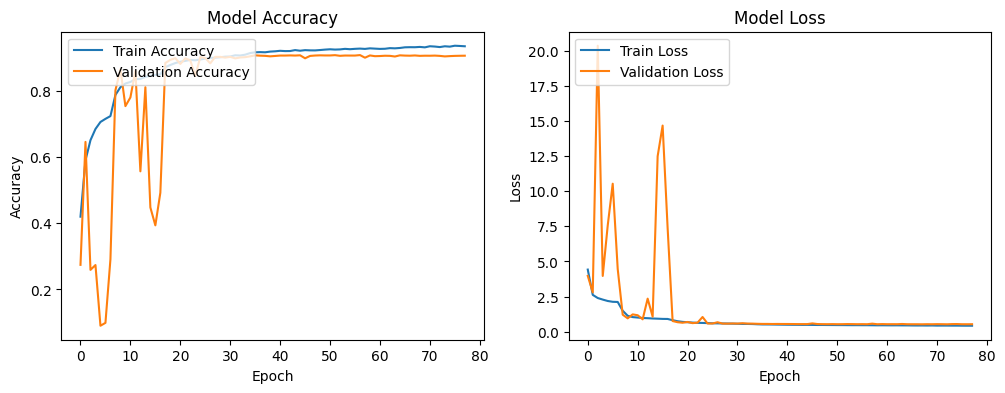

In [16]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.show()

In [17]:
# Google Colab only
# from google.colab import files

# files.download('crohme_model_20240920.keras')

# Image processing part
Move this to GUI part later.

In [20]:
import cv2

# Assuming 'image' is the variable holding your image data
# Check if the image is already in grayscale
if len(image.shape) == 3 and image.shape[2] == 3:
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
else:
    gray = image
    
# Convert the grayscale image to 8-bit single-channel
gray = gray.astype('uint8')

# Apply a binary threshold to the grayscale image
_, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)

# Find contours in the thresholded image
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [21]:
def sort_contours(contours):
    # Sort contours based on the x-coordinate to arrange symbols in the correct order
    contours = sorted(contours, key=lambda x: cv2.boundingRect(x)[0])
    return contours

sorted_contours = sort_contours(contours)

In [32]:
import cv2

def preprocess_image(image_path):
    # Load the image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # Check if the image was loaded correctly
    if image is None:
        raise ValueError(f"Error loading image: {image_path}")
    
    # Resize the image to a fixed size (e.g., 64x64)
    image_resized = cv2.resize(image, (64, 64))
    
    # Normalize the image to [0, 1]
    image_normalized = image_resized.astype('float32') / 255.0
    
    return image_normalized

In [41]:
def segment_characters(image):
    # Convert the image to 8-bit single-channel
    #image_uint8 = (image * 255).astype('uint8')
    if len(image.shape) == 3 and image.shape[2] == 3:
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        gray = image
        
    # Apply a binary threshold to the image
    _, thresh = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY_INV)
    
    # Find contours in the thresholded image
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Sort the contours from left to right
    contours = sorted(contours, key=lambda x: cv2.boundingRect(x)[0])
    
    characters = []
    
    # Iterate over the contours
    for contour in contours:
        # Get the bounding box of the contour
        x, y, w, h = cv2.boundingRect(contour)
        
        # Extract the character from the original image
        character = image[y:y+h, x:x+w]
        
        # Resize the character to 28x28
        character_resized = cv2.resize(character, (28, 28)) # do we really need this?
        
        # Append the character to the list
        characters.append(character_resized)
    
    return characters

In [42]:
def label_to_symbol(label):
    # Define a mapping from label to symbol
    symbols = print(le.classes_)
    
    return symbols[label]

print(le.classes_)

['+DIR' '0DIR' '2DIR' '3DIR' '4DIR' '5DIR' '6DIR' '7DIR' '8DIR' '9DIR'
 'BDIR' 'D2_DeltaDIR' 'D2_alphaDIR' 'D2_betaDIR' 'D2_forallDIR'
 'D2_gammaDIR' 'D2_geqDIR' 'D2_gtDIR' 'D2_inDIR' 'D2_intDIR' 'D2_leqDIR'
 'D2_limDIR' 'D2_logDIR' 'D2_ltDIR' 'D2_muDIR' 'D2_neqDIR' 'D2_phiDIR'
 'D2_piDIR' 'D2_pmDIR' 'D2_sigmaDIR' 'D2_sqrtDIR' 'D2_sumDIR'
 'D2_thetaDIR' 'EDIR' 'MATH_' 'RDIR' 'SHORT_MATH_' 'SLIM_MATH_'
 'SQUARE_MATH_' 'SYN_DeltaDIR' 'SYN_alphaDIR' 'SYN_betaDIR' 'SYN_cosDIR'
 'SYN_forallDIR' 'SYN_gammaDIR' 'SYN_gtDIR' 'SYN_inDIR' 'SYN_inftyDIR'
 'SYN_intDIR' 'SYN_leqDIR' 'SYN_limDIR' 'SYN_logDIR' 'SYN_ltDIR'
 'SYN_muDIR' 'SYN_neqDIR' 'SYN_phiDIR' 'SYN_piDIR' 'SYN_pmDIR'
 'SYN_sigmaDIR' 'SYN_sinDIR' 'SYN_sqrtDIR' 'SYN_sumDIR' 'SYN_tanDIR'
 'SYN_thetaDIR' 'SYN_timesDIR' 'TALL_MATH_' 'aDIR' 'bracketDIR' 'dDIR'
 'fDIR' 'gDIR' 'hDIR' 'iDIR' 'kDIR' 'mDIR' 'nDIR' 'oDIR' 'pDIR' 'qDIR'
 'sDIR' 'tDIR' 'uDIR' 'vDIR' 'wDIR' 'xDIR' 'yDIR' 'zDIR']


In [43]:
def recognize_equation(image_path):
    preprocessed_image = preprocess_image(image_path)
    characters = segment_characters(preprocessed_image)

    equation = ''

    # For each character, resize it to 28x28 and pass it through the model
    for character in characters:
        character_resized = cv2.resize(character, (28, 28))
        character_resized = character_resized.astype('float32') / 255
        character_resized = character_resized.reshape(1, 28, 28, 1)

        # Predict the character
        prediction = model.predict(character_resized)
        predicted_label = np.argmax(prediction)

        # Map the label to the actual character (digit or operator)
        equation += label_to_symbol(predicted_label)

    print(f'Recognized Equation: {equation}')


In [44]:
# Example usage
# recognize_equation(dataset_path + 'scanned_math_equation.png')
recognize_equation(dataset_path + '2DIR/SHORT_MATH_2_0_1162.png')


error: OpenCV(4.10.0) /io/opencv/modules/imgproc/src/contours_new.cpp:327: error: (-2:Unspecified error) in function 'static std::shared_ptr<ContourScanner_> ContourScanner_::create(cv::Mat, int, int, cv::Point)'
> Modes other than RETR_FLOODFILL and RETR_CCOMP support only CV_8UC1 images (expected: 'img.type() == CV_8UC1'), where
>     'img.type()' is 5 (CV_32FC1)
> must be equal to
>     'CV_8UC1' is 0 (CV_8UC1)
